In [18]:
#imports
import numpy as np
import matplotlib.pyplot as plt
#Basic Maths
def factorial(x):
    return (x * factorial(x-1) if x >1 else 1)

def choose(n,x):
    return factorial(n)/(factorial(x)*factorial(n-x))

# Bayesian Inference

Lets say you are going to run some experiments of the uncertain variable $Y$, and you have an idea of what kind of distribution approximates $Y$. What are the statistical parameters that characterise the distribution? Denote the uncertain values that the SP can take as $\theta$.

This problem of deriving the parameters ($\theta$) of a distribution from experimental data is **Statistical Inference**. The frequentist approach to this problem is to calculate the Maximum Likelyhood Estimate, i.e. to compute the value of $\theta$ which maximises the likelihood of observing the results you actually observed. So now we have our MLE. How sure are we in that result? This is where the frequentist paradigm falls down. 

Before observing the experiments, you had an idea of what values the statistical parameters of that distribution are. This $f(\theta)$ is your **Prior**, your assessment, before observing data, of the probablities of the SPs of the underlying probability distribution of $Y$.  

If you then run your experiment, and get results, how should you change your guess of the probability of the possible values of $\theta$, to get to a **Posterior**?

Bayesian Inference involves the use of **Bayes Theorem** to combine your Prior guess of the distribution of a variable $\theta$ with data you have observed (with a normalizing factor) to come to Posterior or new estimate of the distribution of the variable.

$$\text{Posterior} = \frac{\text{Likelyhood x Prior}}{\text{Normalising constant}}$$

$$f(\theta \mid y) = \frac{f(y\mid \theta)f(\theta)}{\int f(y\mid \theta)f(\theta)d\theta}$$

Or for a discrete variable

$$f(\theta \mid y) = \frac{f(y\mid \theta)f(\theta)}{\sum_\theta f(y\mid \theta)f(\theta)}$$


$$f(\theta \mid X=x) = \frac{{5 \choose x} q^x (1-q)^{5-x}  0.6^\theta 0.4^{1-\theta} I_{\theta \in 0,1}}{\sum_\theta {5 \choose x} q^x (1-q)^{5-x}  0.6^\theta 0.4^{1-\theta} I_{\theta \in 0,1}} = 
\frac{{5 \choose x} 0.5^5 0.4 I_{\theta = 0} + {5 \choose x} 0.7^x 0.3^{5-x} 0.6 I_{\theta = 1}}{{5 \choose x} 0.5^5 0.4 + {5 \choose x} 0.7^x 0.3^{5-x} 0.6}$$

## Example 1: A loaded coin with a discrete prior 
You know someone has a coin which has a probability of 70% of coming up heads. They come up to you and say they will play a betting game with you, using what they say is a fair coin. You think the chances they are using the loaded coin (your **Prior**) is 60%.

The terms of the bet are that you're allowed to flip the coin 5 times, at which point you have to decide whether you want to play or not. 

Stated in statistical terms, you can say the unknown variable of whether the coin is loaded or not is $\theta$, with $\theta \in \text{fair (0), loaded (1)}$. 

The fairness or not of the coin is a bernoulli distribution with unknown $p$, $\theta \sim B(p)$. Your prior is $P(\theta = 1) = 0.6$.

The coin flipping will follow a Binomial distribution $X \sim Bin(5, q)$, where $q = 0.7$ if $\theta = 1$, and $q=0.5$ if $\theta = 0$.

What is our new estimate (Posterior) of a the probability that the coin is loaded when we have flipped the coin a 5 times and observed $x$ heads?

$$f(\theta \mid X = x) = \frac{f(X=x \mid \theta)f(\theta)}{\sum_\theta f(X=x \mid \theta)f(\theta)}$$

$$f(X = x \mid \theta) = {5 \choose x} q^x (1-q)^{5-x}$$

$$f(\theta) = 0.6^\theta 0.4^{1-\theta} I_{\theta \in 0,1}$$

We assess $f(\theta = 1 \mid X=x)$

$$f(\theta = 1 \mid X=x) = \frac{{5 \choose x} 0.7^x 0.3^{5-x} 0.6}{\left({5 \choose x} 0.7^x 0.3^{5-x} 0.6 \right)+\left({5 \choose x} 0.5^5 0.4\right)} = \frac{0.7^x 0.3^{5-x} 0.6}{0.7^x 0.3^{5-x} 0.6 +0.0125}$$

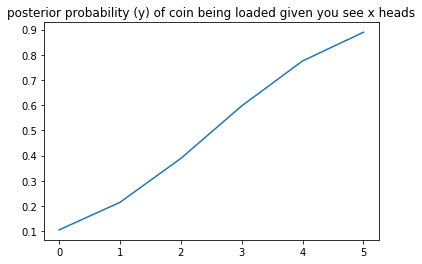

In [24]:
def bay(x):
    denom = (choose(5,x) * 0.5**5 * 0.4) + (choose(5,x) * 0.7**x * 0.3**(5-x) * 0.6)
    i0 = choose(5,x) * 0.5**5 * 0.4
    i1 = choose(5,x) * 0.7**x * 0.3**(5-x) * 0.6
    return (i0/denom, i1/denom)
x = range(0,6)
y = [bay(x)[1] for x in range(0,6)]
plt.plot(x,y)
plt.title('posterior probability (y) of coin being loaded given you see x heads')
plt.show()

## Example 2: A loaded coin with a continuous prior distribution of uncertainty
Say you have the same situation as before: your friend has coin and offers to make a bet with you. In the last example your initial guess was that you were 60% sure the coin was loaded, and therefore 40% that it was not. Your prior uncertainty could be decribed as a bernoulli distribution with probability $P(\theta =1) = 0.6$.

This time we only know your friend has a coin which may or may not be fair. We don't know how often, when flipped, it will come up with heads vs. tails, if it's loaded or fair. Our unknown variable $\theta$ here is the probability the coin will come up heads vs. tails. 

Our starting position is that we have no idea what $\theta$ is, it could be any value between 0 and 1, with all possibilities being equally likely. This describes a uniform distribution $\theta \sim U(0,1)$.

This time we only get to flip the coin once (i.e. it's now a Bernoulli, not a Binomial distribution).

Let's figure out the posterior in this scenario:

$$f(\theta \mid X=x) = \frac{f(X=x\mid\theta)f(\theta)}{\int f(X=x\mid\theta)f(\theta)d\theta}$$

Since $X \sim B(q)$, $f(x) = q^x (1-q)^{1-x}$ 

Before, the relationship between $q$ and $\theta$ was that if $\theta = 1$ (i.e. the coin was loaded 70% to heads), $q$ would be 0.7, and 0.5 if $\theta = 0$. Here it's even simpler: $q$ is the probability that the coin will come up heads, which is $\theta$. so $$f(x  \mid \theta) = \theta^x (1-\theta)^{1-x}$$

Since $\theta$ is now uniformally distributed, $f(\theta) = \frac{1}{1-0} I_{0 \le \theta \le 1} = 1 \cdot I_{0 \le \theta \le 1}$.

Plugging into Bayes we get:

$$\frac{\theta^x (1-\theta)^{1-x}  I_{0 \le \theta \le 1}}{\int_{-\infty}^\infty \theta^x (1-\theta)^{1-x}  I_{0 \le \theta \le 1}d\theta} = \frac{\theta^x (1-\theta)^{1-x}  I_{0 \le \theta \le 1}}{\int_{0}^1 \theta^x (1-\theta)^{1-x}d\theta} $$

The integration in general terms isn't so easy here, so lets set X=1, i.e. the coin comes up heads.

$$ f(\theta \mid X=1) = \frac{\theta I_{0 \le \theta \le 1}}{\int_{0}^1 \theta d\theta} = \frac{\theta I_{0 \le \theta \le 1}}{\left[\frac{1}{2}\theta^2\right]_0^1} = \frac{\theta I_{0 \le \theta \le 1}}{\frac{1}{2}} = 2\theta I_{0 \le \theta \le 1}$$

## Posterior intervals and intervals of interest

From the above example 2 we can plot both the prior PDF and the Posterior PDF when X=1

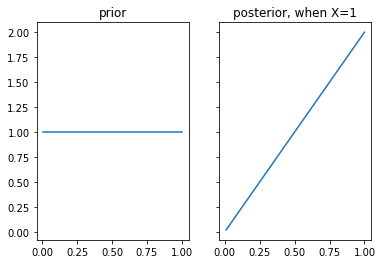

In [32]:
x = [x/100 for x in range(1,101)]
fxPrior = [1 for x in x]
fxPost = [2*x for x in x]
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True)
ax1.plot(x,fxPrior)
ax1.set_title('prior')
ax2.set_title('posterior, when X=1')
ax2.plot(x,fxPost)
plt.show()

Things to notice about the posterior function:

* the chance that $\theta$ is close to zero (i.e. the coin will nearly always come up tails) is very low, which you would expect if you'd just thrown a head.
* A probability interval for the posterior can be obtained by integrating over that interval, i.e. $P(a \lt \theta \lt b) = \int_a^b f(\theta | X=1) d\theta$
* Using this you can obtain an interval of interest, similar in concept to the Confidence Interval from the frequentist world, which are points in the function between which 95% (or some other number) of the probabilities lie. There are 2 methods: Equal Tailed intervals, and Highest Posterior Density intervals.


### Equal Tailed Intervals
In this method you say that each tail has an equal amount of probability in it, e.g. 2.5% each for a 95% interval.

A good way to do this is to find $P(\theta < q) = \int_0^q f(\theta|X=x) d\theta$. Then you can use the same arithmatic as you can when you do confidence intervals. 

From the above example $\int_0^q 2\theta^2 d\theta = q^2$, so $P(\theta \lt q \mid Y=1) = q^2$,  and $P\left(\theta \lt \sqrt{q} \mid Y=1\right) = q$. 

$P\left(\theta \lt \sqrt{.975} \mid Y=1\right) = .975$

$P\left(\theta \lt \sqrt{.025} \mid Y=1\right) = .025$

$P\left(\sqrt{.025} \lt \theta \lt \sqrt{.975} \mid Y=1\right) = .95$

### Highest Posterior Density
Mor tricky: this is basically the shortest interval where you can find 95% (or other %) of the probability. So given several options you can find the HPD by deducting the lower value from upper value: the smallest result is the HPD.

For our posterior distribution example above, the shape of the graph makes it obvious: it starts at $\theta = 1$ and goes left until the desired percentage of probability is contained in it.

## Prior Predictive

Let's say we want to get a view on what results we expect from the experiment before we run it. 

In other words, we want to know the probability distribution of $Y$, $f(y)$, the probability function of $Y$ *unconditioned* on the parameter $\theta$ (or equivalently across all possible values of $\theta$).

Recall that this is the denominator of Bayes' Theorum, which can also be written $f(y) = \int f(y \mid \theta)f(\theta) d\theta$.

The integral can actually get pretty bloody complicated, so generally we rely on a few special cases.

## Posterior predictive

The logical follow on question for the above is that, given you've run your experiement and now have your Posterior $f(\theta \mid y_1)$, what results should you expect if you ran the experiment again (i.e. what do you think your second result $y_2$ would be)? 

You can reuse the same forumla, plugging in $y_1 \mid y_2$ in place of $y$, your posterior for your old prior, and conditioning $y_2$ on both $\theta$ and $y_1$.  

$$f(y_2 \mid y_1) = \int f(y_2 \mid \theta,y_1)f(\theta \mid y_1) d\theta$$

If $Y_1$ and $Y_2$ are independent, then conditioning $y_2$ on $y_1$ doesn't actually do anything (as long as we are already conditioning on $\theta$ and we can ignore it.

$$f(y_2 \mid y_1) = \int f(y_2 \mid \theta)f(\theta \mid y_1) d\theta$$

## Conjugate priors

A conjugate prior is one where, if you use a certain distribution as a rior, you get another of those distributions as a posterior. This makes it easy to iterate your method.

A good example of this is using a Beta distribution (including  Uniform(0,1), which is a special case of a Beta) prior with a Binomial or Bernoulli experimental variable. Mathematically you end up with a Beta distributed posterior.